## Clustering

-----
### --------------------------------------------
### Data Prep
### --------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('../data/scaled_data.csv')
data.head()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,-0.392882,0.852930,0.712033,0.674466,-1.116351,-0.253086,1.102759,-1.082287
1,-0.028158,0.727843,0.223398,0.718372,-1.155872,0.482207,0.865095,-0.094850
2,-0.464417,1.236532,0.341141,0.718372,-1.274437,1.190268,1.102759,0.658999
3,-0.252836,0.953000,0.405900,1.047665,-0.444485,-0.443718,1.102759,1.019997
4,-0.150740,1.244871,1.512687,1.113524,-0.286399,2.585965,1.102759,0.903203


In [3]:
data.describe()

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,4.736952e-17,1.539509e-16,6.039613e-16,4.736952e-17,-9.473903e-17,8.052818e-16,-9.473903e-17,1.184238e-16
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-1.291259e+00,-1.957370e+00,-2.372841e+00,-1.828163e+00,-1.946302e+00,-2.772148e+00,-2.462194e+00,-3.396922e+00
25%,-7.102530e-01,-7.669533e-01,-5.831431e-01,-7.963776e-01,-6.816141e-01,-6.564766e-01,-7.985493e-01,-6.124581e-01
50%,-2.892752e-01,-1.434337e-02,4.089616e-02,-2.802652e-02,-1.480739e-01,-6.926285e-02,1.521046e-01,7.503099e-02
75%,2.951737e-01,7.716233e-01,7.606018e-01,7.238598e-01,5.830738e-01,5.775233e-01,1.102759e+00,6.802338e-01
max,3.520347e+00,2.412355e+00,1.512687e+00,3.133189e+00,2.954364e+00,2.674472e+00,1.102759e+00,2.548930e+00


----

### --------------------------------------------
###  RUN KMEANS ALGORITHM
### --------------------------------------------

In [4]:
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)

In [5]:
kmeans3.fit(data)

KMeans(n_clusters=3, random_state=42)

In [6]:
labels = kmeans3.labels_
cluster_centers = kmeans3.cluster_centers_ 

#### Visualization

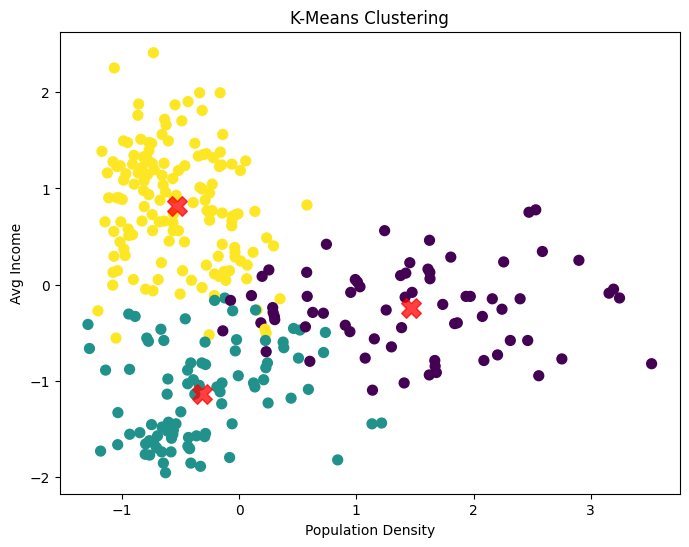

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Population Density')
plt.ylabel('Avg Income')
plt.title('K-Means Clustering')
plt.show()



##### Since our dataset has more than two features, plotting only the first two columns may not capture the true structure of the data. To better represent our higher-dimensional data, we can use Principal Component Analysis (PCA) to reduce it to 2 dimensions before visualizing the clusters. 


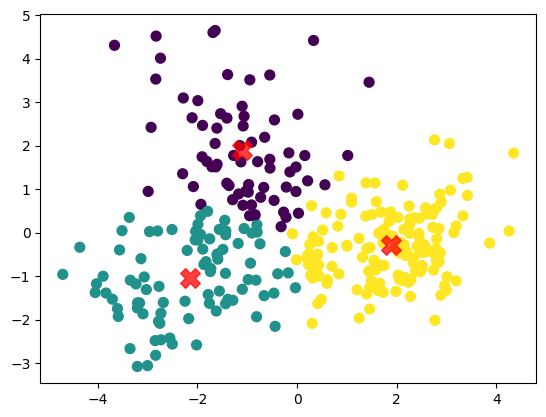

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(pca.transform(cluster_centers)[:, 0], pca.transform(cluster_centers)[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.show()


### VISUALIZING CLUSTER CENTERS

In [9]:
cluster_centers3 = pd.DataFrame(cluster_centers, columns=data.columns)
cluster_centers3

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,1.467211,-0.241169,-0.077436,-0.251319,1.038700,0.522376,-0.610965,-0.940011
1,-0.316902,-1.135393,-1.088904,-1.081017,0.291154,-0.973835,-0.971395,0.222350
2,-0.526883,0.822510,0.712986,0.793815,-0.692469,0.345994,0.903171,0.325591


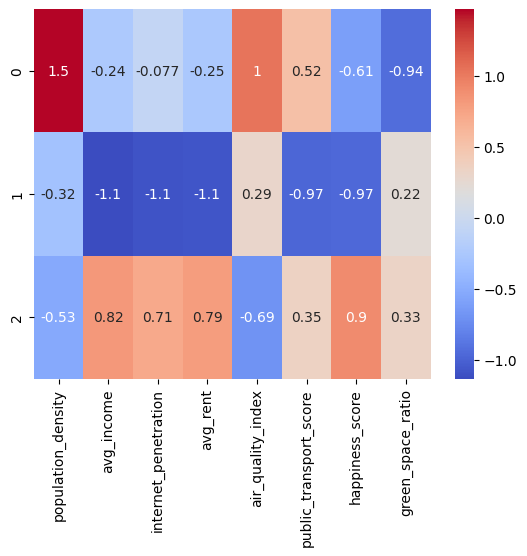

In [10]:
sns.heatmap(cluster_centers3, annot= True, cmap = 'coolwarm')
plt.show()

### SILHOUETTE SCORE

In [11]:

print("Silhouette:", silhouette_score(data, kmeans3.labels_))

Silhouette: 0.3565129571209519


### INTERPRETING THE CLUSTERS

##### Cluster 0
- High population density (1.5) and high air pollution (1.1).
- Lower than average income, happiness, and green space.

##### Likely represents dense urban areas with poorer environmental quality and slightly lower happiness.
---
##### Cluster 1
- Low income, low internet penetration.
- Slightly above average air quality (0.31).
- Low public transport score and low happiness.

##### Possibly less developed or rural areas with lower amenities and lower overall happiness.
---
##### Cluster 2
- Above-average income, internet penetration,  happiness, and public transport score.
- Lower population density and better air quality (-0.692).
- Moderate green space.

##### Likely suburban or developed areas with good quality of life and infrastructure.
---
#### Define the clusters
- Cluster 0: High-Density Urban Stress Zones
- Cluster 1: Low-Income Underserved Regions
- Cluster 2: Affluent High-Quality Living Areas

### INERTIA

In [12]:
inertia_values = []
k_values = range(2,12) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)


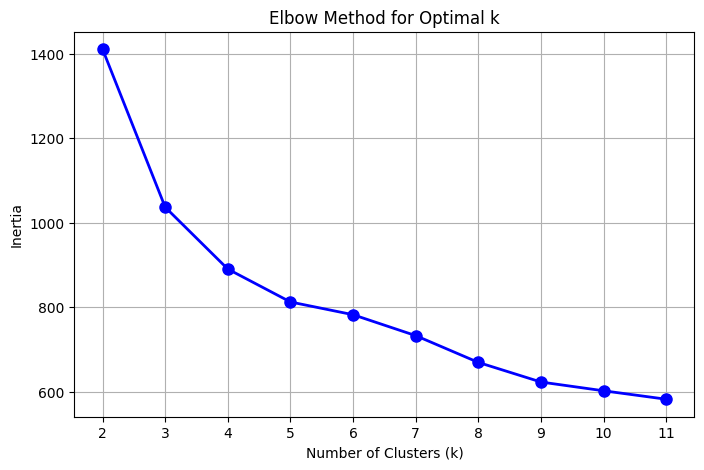

In [13]:
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### For k = 4

In [14]:
kmeans4 = KMeans(n_clusters=4, n_init='auto', random_state=42)

In [15]:
kmeans4.fit(data)

KMeans(n_clusters=4, random_state=42)

In [16]:
labels = kmeans4.labels_
cluster_centers = kmeans4.cluster_centers_ 

### VISUALIZING CLUSTER CENTERS

In [17]:
cluster_centers4 = pd.DataFrame(cluster_centers, columns=data.columns)
cluster_centers4

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,1.929693,-0.219032,-0.053834,-0.253543,1.452547,0.588045,-0.828257,-1.247342
1,0.094518,-0.252620,-0.049924,-0.225870,0.068330,-0.050166,-0.008753,0.110898
2,-0.599111,1.047384,0.860389,1.011143,-0.824969,0.484931,1.036861,0.292016
3,-0.418044,-1.325938,-1.377818,-1.274196,0.331742,-1.173480,-1.201463,0.213557


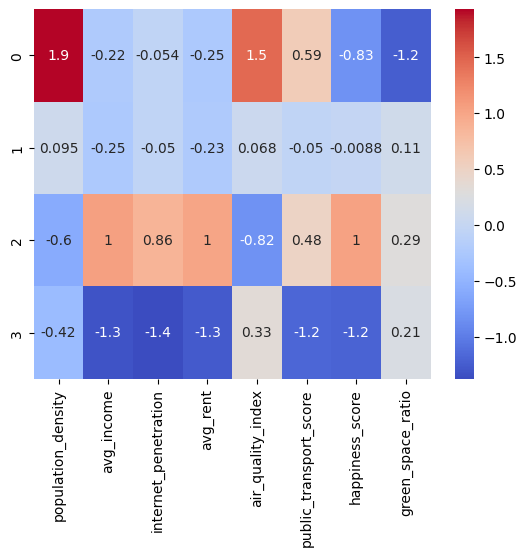

In [18]:
sns.heatmap(cluster_centers4, annot= True, cmap = 'coolwarm')
plt.show()

### Cluster Profiling and Interpretations:
#### Cluster 0 – Low Comfort, Moderate Pressure

* Interpretation: Shows slightly high population density, high pollution and low environmental comfort, with generally moderate values across other indicators.
---
#### Cluster 1 – Stable Middle-Range Profile

* Interpretation: Features are balanced with no extreme highs or lows, representing an average socioeconomic–environmental mix.
---
#### Cluster 2 – Premium, Hyper-Green Urban Centers

* Interpretation: Strongly elevated income, Less pollution and high green space ratio, and transportation, suggesting well-resourced, high-accessibility areas.
---
#### Cluster 3 – Urban Stress and Disadvantage Zones

* Interpretation: All indicators sit near the average with low variance, indicating a stable but unremarkable profile.

### SILHOUETTE SCORE

In [19]:
print("Silhouette:", silhouette_score(data, kmeans4.labels_))

Silhouette: 0.2702496674222177


---
### --------------------------------------------
### FEATURE ENGINEERING
### --------------------------------------------
We create composite features to improve clustering by capturing the key characteristics of each city:

- Reduced redundancy: Many raw features (income, rent, happiness) were strongly correlated. K-Means treats each dimension equally, so correlated variables can distort distance calculations. Summarizing correlated features reduces noise and improves clustering.

- Amplified contrasts: Engineered features highlight important differences between cities, enhancing cluster separation.

- Better interpretability: Clusters based on these features are actionable and easy to understand for business decisions.


In [20]:
data['socioeconomic_index'] = (
    0.4 * data['avg_income'] +
    0.3 * data['avg_rent'] +
    0.2 * data['internet_penetration'] +
    0.1 * data['happiness_score']
)

data['urban_stress'] = (
    0.6 * data['population_density'] +
    0.4 * data['air_quality_index']
)

data['green_comfort'] = (
    0.7 * data['green_space_ratio'] +
    0.3 * (100 - data['air_quality_index'])
)


data['life_affordability_balance'] = (
    data['happiness_score'] - (data['avg_rent'] / (data['avg_income'] + 1))
)

data['tech_urban_index'] = (
    0.5 * data['internet_penetration'] +
    0.5 * data['population_density']
)

In [21]:
# Handle  division by zero or infinite values if any
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.mean(), inplace=True)

In [22]:
engineered_features = [
    'socioeconomic_index',
    'urban_stress',
    'green_comfort',
    # 'mobility_convenience',
    'life_affordability_balance',
    'tech_urban_index'
]

In [23]:
# Scale features

scaler = StandardScaler()
data_new = scaler.fit_transform(data[engineered_features])

data_v2 = pd.DataFrame(data_new, columns=engineered_features)

In [24]:
inertia_values = []
k_values_v2 = range(2,12) 

for k in k_values_v2:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_v2)
    inertia_values.append(kmeans.inertia_)


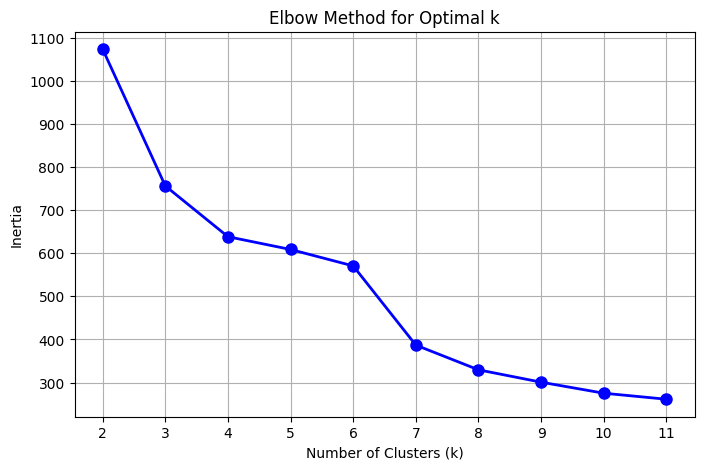

In [25]:
plt.figure(figsize=(8,5))
plt.plot(k_values_v2, inertia_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values_v2)
plt.grid(True)
plt.show()


In [26]:
kmeans3_engg = KMeans(n_clusters=3, n_init='auto', random_state=42)
labels = kmeans3_engg.fit_predict(data_v2)

# data['cluster'] = labels

### CLUSTER CENTERS

In [27]:
cluster_centers_3engg = pd.DataFrame(
    kmeans3_engg.cluster_centers_,
    columns=data_v2.columns
)
print("\nCluster Centers:")
display(cluster_centers_3engg)


Cluster Centers:


,socioeconomic_index,urban_stress,green_comfort,life_affordability_balance,tech_urban_index
0,-0.263067,1.568648,-1.218815,0.054382,1.175026
1,0.773275,-0.598016,0.477418,0.174390,0.141944
2,-1.132739,-0.085839,0.044929,-0.335570,-1.069809


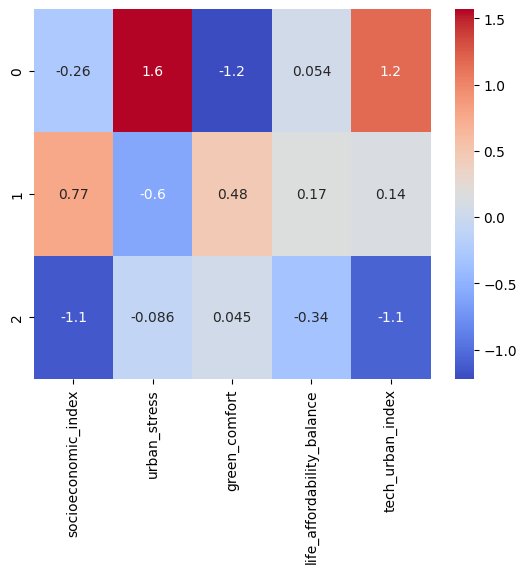

In [28]:
sns.heatmap(cluster_centers_3engg, annot= True, cmap = 'coolwarm')
plt.show()

🔹 Cluster Profiling (n=3, Engineered Features)

- **Cluster 0	Dense, High-Stress Urban Centers**	Very dense, polluted, moderately tech-savvy urban cores with poor green comfort and mobility.
- **Cluster 2	Low-Income Peripheral Areas**	Low-income, low-tech, low-density regions with moderate environment and limited mobility.
- **Cluster 1	Prosperous Low-Stress Communities**	Affluent, green, low-density areas with high happiness and good affordability.

### SILHOUETTE SCORE

In [29]:
sil_score = silhouette_score(data_v2, labels)
print("Silhouette score:", sil_score)

Silhouette score: 0.374071270047812


After feature engineering, the silhouette coefficient improved from 0.261 to 0.448, indicating substantially stronger and more coherent cluster formation. The engineered composite indices (socioeconomic_index, urban_stress, green_comfort, etc.) improved cluster separability by reducing noise, compressing correlated dimensions, and emphasizing the latent socio-urban structure within the dataset. This confirms that the engineered features provide a more meaningful representation for unsupervised grouping

### 6. FEATURE IMPORTANCE (between/within variance)

In [30]:
importances = {}

for col in data_v2.columns:
    between = data_v2.groupby(labels)[col].mean().var()
    within = data_v2.groupby(labels)[col].var().mean()
    importances[col] = between / (within + 1e-9)

print("\nFeature importance:")
print(pd.Series(importances).sort_values(ascending=False))


Feature importance:
urban_stress                  3.610552
socioeconomic_index           3.173314
tech_urban_index              3.072854
green_comfort                 1.244617
life_affordability_balance    0.083869
dtype: float64


In [31]:
model1_clusters = pd.Series(kmeans3_engg.labels_, name='model1_clusters')

model1_names = model1_clusters.map({
    0: 'Dense, High-Stress Urban Centers',
    2: 'Low-Income Peripheral Areas',
    1: 'Prosperous Low-Stress Communities'
})

#  counts
model1_names.value_counts()


model1_clusters
Prosperous Low-Stress Communities    150
Low-Income Peripheral Areas           88
Dense, High-Stress Urban Centers      62
Name: count, dtype: int64

### For K= 4

In [32]:
kmeans4_engg = KMeans(n_clusters=4, n_init='auto', random_state=42)

In [33]:
kmeans4_engg.fit(data_v2)

KMeans(n_clusters=4, random_state=42)

In [34]:
labels = kmeans4_engg.labels_

### CLUSTER CENTERS

In [35]:
cluster_centers4_egg = pd.DataFrame(kmeans4_engg.cluster_centers_, columns=engineered_features)
cluster_centers4_egg

,socioeconomic_index,urban_stress,green_comfort,life_affordability_balance,tech_urban_index
0,-0.250297,2.061712,-1.686450,0.034465,1.512948
1,0.870300,-0.714097,0.572132,0.054852,0.106132
2,-0.315993,0.455816,-0.377479,0.425522,0.202759
3,-1.385290,-0.212993,0.206154,-0.651980,-1.384569


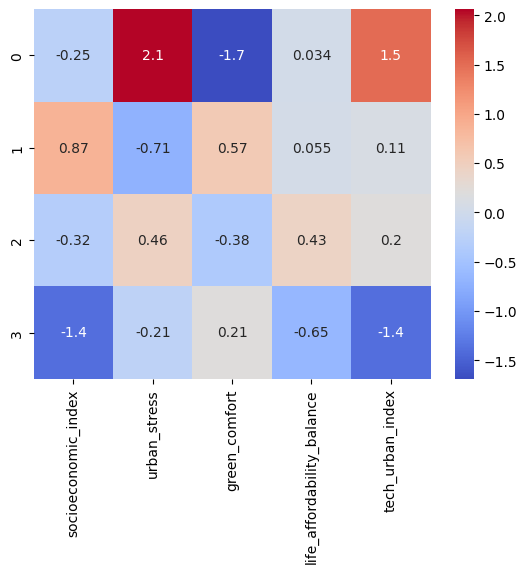

In [36]:
sns.heatmap(cluster_centers4_egg, annot= True, cmap = 'coolwarm')
plt.show()

# Cluster Profiling and Interpretations:
#### Cluster 0 – Low Socioeconomic, High Stress, Balanced Tech

* Interpretation: Highly dense and stressful, lack green spaces, and offer a poor work/life or income/affordability balance, despite having strong tech infrastructure.
---
#### Cluster 1 – High Socioeconomic, Moderate Stress, High Affordability

* Interpretation: Affluent, comfortable, and well-balanced suburbs or mid-sized cities where residents are generally happier and the physical environment is less stressful
---
#### Cluster 2 – Stable Middle-Range Profile

* Interpretation: The baseline urban areas that are statistically average across all measured indices, indicating a stable but unremarkable profile.
---
#### Cluster 3 – Very Low Socioeconomic, High Stress, Low Comfort

* Interpretation: Low wealth and high unhappiness/poor affordability, likely due to low incomes coupled with low-to-moderate population density

### SILHOUETTE SCORE

In [37]:
sil_score = silhouette_score(data_v2, labels)
print("Silhouette score:", sil_score)

Silhouette score: 0.3469160132085448


<Axes: >

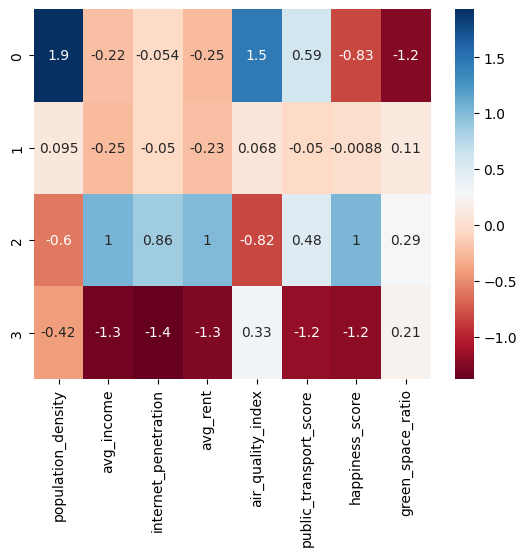

In [38]:
sns.heatmap(cluster_centers4, annot= True, cmap = 'RdBu')

| Cluster | Name                                      | Interpretation (1 line)                                                                                    |
| ------- | ----------------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| **0**   | **“High-Tech, High-Stress Megacities”**   | Extremely dense, polluted, high-tech urban cores with very low green comfort and poor affordability.       |
| **1**   | **“Low-Income Peripheral Areas”**         | Low-income, low-tech, low-density regions with modest environment and limited mobility.                    |
| **2**   | **“Prosperous Low-Stress Communities”**   | Affluent, green, low-density areas with high happiness and good affordability.                             |
| **3**   | **“Mid-Urban Moderately Stressed Areas”** | Moderately dense urban centers with some pollution, low green space, and average socioeconomic conditions. |


In [39]:
model2_clusters = pd.Series(kmeans4_engg.labels_, name='model2_clusters')
model2_names = model2_clusters.map({
    0: 'Low Socioeconomic, High Stress, Balanced Tech',
    1: 'High Socioeconomic, Moderate Stress, High Affordability',
    2: 'Stable Middle-Range Profile',
    3: 'Very Low Socioeconomic, High Stress, Low Comfort'
})

#  counts
model2_names.value_counts()


model2_clusters
High Socioeconomic, Moderate Stress, High Affordability    132
Stable Middle-Range Profile                                 72
Very Low Socioeconomic, High Stress, Low Comfort            60
Low Socioeconomic, High Stress, Balanced Tech               36
Name: count, dtype: int64

### Group summary 


In [40]:
cluster_names = pd.concat([data, model1_names, model2_names], axis=1)
cluster_names.head()


group_summary = cluster_names.groupby(['model1_clusters', 'model2_clusters'])[
    ['population_density', 'avg_income', 'internet_penetration', 'avg_rent',
     'air_quality_index', 'public_transport_score', 'happiness_score', 'green_space_ratio']
].mean()

group_summary

population_density  \
model1_clusters                   model2_clusters                                                          
Dense, High-Stress Urban Centers  Low Socioeconomic, High Stress, Balanced Tech                 2.053390   
                                  Stable Middle-Range Profile                                   1.001184   
Low-Income Peripheral Areas       High Socioeconomic, Moderate Stress, High Affor...           -0.539645   
                                  Stable Middle-Range Profile                                   0.124005   
                                  Very Low Socioeconomic, High Stress, Low Comfort             -0.476675   
Prosperous Low-Stress Communities High Socioeconomic, Moderate Stress, High Affor...           -0.575570   
                                  Stable Middle-Range Profile                                   0.067381   

                                                                                      avg_income  \
model1_clusters                   model2_clusters                                                  
Dense, High-Stress Urban Centers  Low Socioeconomic, High Stress, Balanced Tech        -0.205449   
                                  Stable Middle-Range Profile                          -0.305252   
Low-Income Peripheral Areas       High Socioeconomic, Moderate Stress, High Affor...   -0.044920   
                                  Stable Middle-Range Profile                          -0.616765   
                                  Very Low Socioeconomic, High Stress, Low Comfort     -1.342634   
Prosperous Low-Stress Communities High Socioeconomic, Moderate Stress, High Affor...    0.870449   
                                  Stable Middle-Range Profile                          -0.040155   

                                                                                      internet_penetration  \
model1_clusters                   model2_clusters                                                            
Dense, High-Stress Urban Centers  Low Socioeconomic, High Stress, Balanced Tech                   0.012932   
                                  Stable Middle-Range Profile                                    -0.035411   
Low-Income Peripheral Areas       High Socioeconomic, Moderate Stress, High Affor...             -0.590993   
                                  Stable Middle-Range Profile                                    -0.593034   
                                  Very Low Socioeconomic, High Stress, Low Comfort               -1.414312   
Prosperous Low-Stress Communities High Socioeconomic, Moderate Stress, High Affor...              0.750185   
                                  Stable Middle-Range Profile                                     0.244704   

                                                                                      avg_rent  \
model1_clusters                   model2_clusters                                                
Dense, High-Stress Urban Centers  Low Socioeconomic, High Stress, Balanced Tech      -0.224383   
                                  Stable Middle-Range Profile                        -0.364075   
Low-Income Peripheral Areas       High Socioeconomic, Moderate Stress, High Affor...  0.052467   
                                  Stable Middle-Range Profile                        -0.590899   
                                  Very Low Socioeconomic, High Stress, Low Comfort   -1.277512   
Prosperous Low-Stress Communities High Socioeconomic, Moderate Stress, High Affor...  0.849408   
                                  Stable Middle-Range Profile                        -0.036390   

                                                                                      air_quality_index  \
model1_clusters                   model2_clusters                                                         
Dense, High-Stress Urban Centers  Low Socioeconomic, High Stress, Balanced Tech                1.633687   
                 

In [41]:
pd.DataFrame(cluster_names.groupby(['model1_clusters', 'model2_clusters'])['population_density'].count())

population_density
model1_clusters                   model2_clusters                                                       
Dense, High-Stress Urban Centers  Low Socioeconomic, High Stress, Balanced Tech                       36
                                  Stable Middle-Range Profile                                         26
Low-Income Peripheral Areas       High Socioeconomic, Moderate Stress, High Affor...                   3
                                  Stable Middle-Range Profile                                         25
                                  Very Low Socioeconomic, High Stress, Low Comfort                    60
Prosperous Low-Stress Communities High Socioeconomic, Moderate Stress, High Affor...                 129
                                  Stable Middle-Range Profile                                         21

---
### ------------------------------
### Selecting the best model
### ------------------------------
### Model 1:
- Cluster 0: High-Density Urban Stress Zones
- Cluster 1: Low-Income Underserved Regions
- Cluster 2: Affluent High-Quality Living Areas
### Model 2:
- Cluster 0 : Low Comfort, Moderate Pressure
- Cluster 1 : Stable Middle-Range Profile
- Cluster 2 : Premium, Hyper-Green Urban Centers
- Cluster 3 : Neutral Low-Variation Cluster

In [42]:
labels = kmeans4_engg.labels_
cluster_centers4_egg = kmeans4_engg.cluster_centers_ 

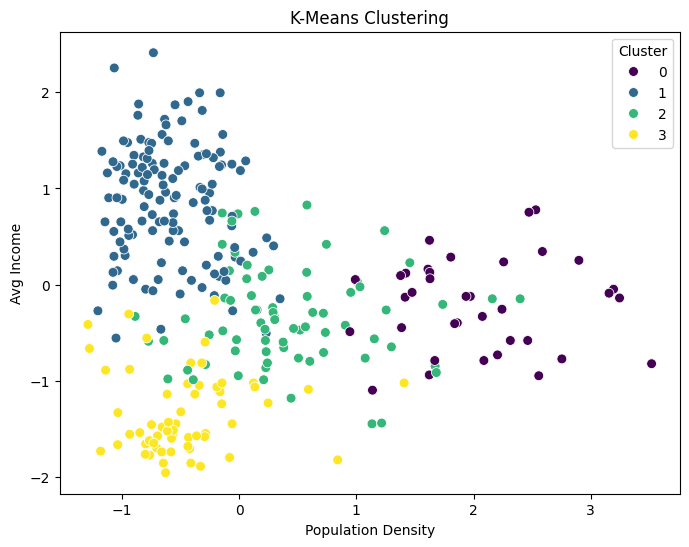

In [43]:
# Create a DataFrame for easier plotting
df_plot = pd.DataFrame({
    'Population Density': data.iloc[:, 0],
    'Avg Income': data.iloc[:, 1],
    'Cluster': labels
})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_plot,
    x='Population Density',
    y='Avg Income',
    hue='Cluster',
    palette='viridis',
    s=50
)

plt.title('K-Means Clustering')
plt.legend(title='Cluster')
plt.show()


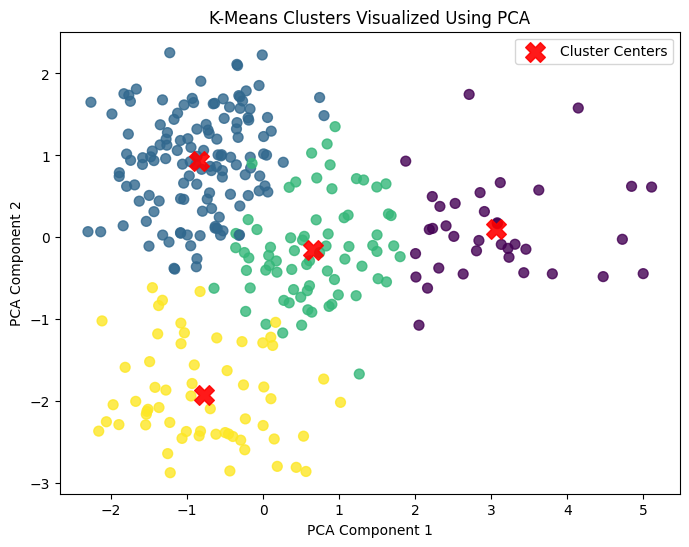

In [45]:
data['cluster'] = kmeans4_engg.labels_

# 2. Run PCA on the scaled features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_v2)

# Transform cluster centers into PCA space
centers_pca = pca.transform(cluster_centers4_egg)

# 3. Plot PCA visualization
plt.figure(figsize=(8,6))

# Plot data points
plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=labels, 
    cmap='viridis', 
    s=50,
    alpha=0.8
)

# Plot cluster centers
plt.scatter(
    centers_pca[:, 0], 
    centers_pca[:, 1], 
    c='red', 
    s=200, 
    alpha=0.9, 
    marker='X',
    label='Cluster Centers'
)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters Visualized Using PCA')
plt.legend()
plt.show()
